In [340]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [341]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [342]:
bc.target.shape

(569,)

In [343]:
bc.data[10]

array([1.602e+01, 2.324e+01, 1.027e+02, 7.978e+02, 8.206e-02, 6.669e-02,
       3.299e-02, 3.323e-02, 1.528e-01, 5.697e-02, 3.795e-01, 1.187e+00,
       2.466e+00, 4.051e+01, 4.029e-03, 9.269e-03, 1.101e-02, 7.591e-03,
       1.460e-02, 3.042e-03, 1.919e+01, 3.388e+01, 1.238e+02, 1.150e+03,
       1.181e-01, 1.551e-01, 1.459e-01, 9.975e-02, 2.948e-01, 8.452e-02])

In [344]:
bc.data.shape

(569, 30)

# Preprocessing


In [345]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(bc.data, bc.target, test_size = 0.2)

In [346]:
print(f"Features => train : {x_train.shape} - test : {x_test.shape}")
print(f"Labels => train : {y_train.shape} - test : {y_test.shape}")

Features => train : (455, 30) - test : (114, 30)
Labels => train : (455,) - test : (114,)


# Database normalization


In [347]:
 x_train[0]

array([1.364e+01, 1.560e+01, 8.738e+01, 5.753e+02, 9.423e-02, 6.630e-02,
       4.705e-02, 3.731e-02, 1.717e-01, 5.660e-02, 3.242e-01, 6.612e-01,
       1.996e+00, 2.719e+01, 6.470e-03, 1.248e-02, 1.810e-02, 1.103e-02,
       1.898e-02, 1.794e-03, 1.485e+01, 1.905e+01, 9.411e+01, 6.834e+02,
       1.278e-01, 1.291e-01, 1.533e-01, 9.222e-02, 2.530e-01, 6.510e-02])

In [348]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [349]:
 x_train[0]

array([0.31515926, 0.24439834, 0.30122314, 0.18316013, 0.45183013,
       0.13312213, 0.11023899, 0.18543738, 0.33181818, 0.13984836,
       0.07702336, 0.06652228, 0.05838006, 0.0373141 , 0.16170922,
       0.07151706, 0.05957867, 0.26968215, 0.1561603 , 0.03851245,
       0.24617574, 0.20005692, 0.21764032, 0.12244396, 0.40849744,
       0.1124463 , 0.12244409, 0.31767137, 0.19022275, 0.08528315])

# Classification

In [350]:
from sklearn.metrics import accuracy_score , recall_score , precision_score

def calculate_metrics(y_train , y_test , y_pred_train , y_pred_test):

    acc_train = accuracy_score(y_train , y_pred_train)
    acc_test = accuracy_score(y_test , y_pred_test)

    p = precision_score(y_test , y_pred_test)
    r = recall_score(y_test , y_pred_test)

    print(f"Acc train = {acc_train} , Acc test = {acc_test} , precision test = {p} , recall test = {r}")

    return acc_train , acc_test , p ,r



# 1.Naive Bayes

In [351]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [352]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb , acc_test_gnb , p_gnb ,r_gnb = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 0.9406593406593406 , Acc test = 0.9298245614035088 , precision test = 0.9367088607594937 , recall test = 0.961038961038961


# 2.KNN

In [353]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8 , algorithm = 'kd_tree' , leaf_size = 28)
knn.fit(x_train , y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [354]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn , acc_test_knn , p_knn ,r_knn = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 0.9758241758241758 , Acc test = 0.956140350877193 , precision test = 0.95 , recall test = 0.987012987012987


# 3.Decision Tree

In [355]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 128 , min_samples_split = 2 , criterion = 'gini')
dt.fit(x_train , y_train)


DecisionTreeClassifier(max_depth=128)

In [356]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt , acc_test_dt , p_dt ,r_dt = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 1.0 , Acc test = 0.9035087719298246 , precision test = 0.9125 , recall test = 0.948051948051948


## 4.Random Forest

In [357]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100 , max_depth = 64 , min_samples_split = 2)
rf.fit(x_train ,y_train)

RandomForestClassifier(max_depth=64)

In [358]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf , acc_test_rf , p_rf ,r_rf = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 1.0 , Acc test = 0.9298245614035088 , precision test = 0.9367088607594937 , recall test = 0.961038961038961


## 5.SVM

In [359]:
from sklearn.svm import SVC

svm = SVC(kernel = 'poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [360]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm , acc_test_svm , p_svm ,r_svm = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 0.989010989010989 , Acc test = 0.9736842105263158 , precision test = 0.9743589743589743 , recall test = 0.987012987012987


## 6.Logistic Regression

In [361]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [362]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr , acc_test_lr , p_lr ,r_lr = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 0.9736263736263736 , Acc test = 0.956140350877193 , precision test = 0.95 , recall test = 0.987012987012987


## 7.ANN

In [363]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes = 100 , activation ='relu', solver = 'adam' , batch_size = 64)
ann.fit(x_train , y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=100)

In [364]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann , acc_test_ann , p_ann ,r_ann = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

Acc train = 0.989010989010989 , Acc test = 0.9736842105263158 , precision test = 0.9743589743589743 , recall test = 0.987012987012987


# Comparison

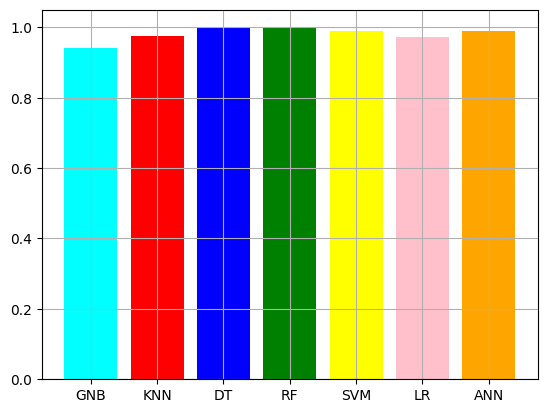

In [365]:
 import matplotlib.pyplot as plt
 
 acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf , acc_train_svm , acc_train_lr , acc_train_ann]
 title = ['GNB' , 'KNN' , 'DT' , 'RF' , 'SVM' , 'LR' , 'ANN']
 color = ['cyan' , 'red' , 'blue' , 'green' , 'yellow' , 'pink' , 'orange']


 plt.bar(title , acc_train , color = color)
 plt.grid()
 plt.show()

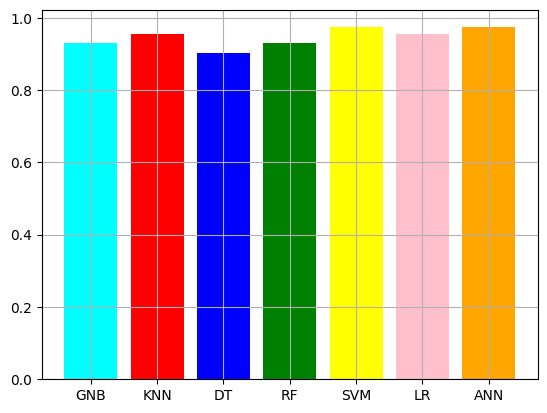

In [367]:
 acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf , acc_test_svm , acc_test_lr , acc_test_ann]
 title = ['GNB' , 'KNN' , 'DT' , 'RF' , 'SVM' , 'LR' , 'ANN']
 color = ['cyan' , 'red' , 'blue' , 'green' , 'yellow' , 'pink' , 'orange']


 plt.bar(title , acc_test , color = color)
 plt.grid()
 plt.show()

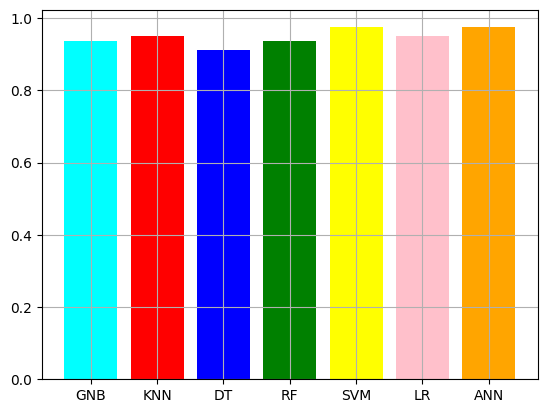

In [369]:
 p_test = [p_gnb, p_knn, p_dt, p_rf , p_svm , p_lr , p_ann]
 title = ['GNB' , 'KNN' , 'DT' , 'RF' , 'SVM' , 'LR' , 'ANN']
 color = ['cyan' , 'red' , 'blue' , 'green' , 'yellow' , 'pink' , 'orange']


 plt.bar(title , p_test , color = color)
 plt.grid()
 plt.show()

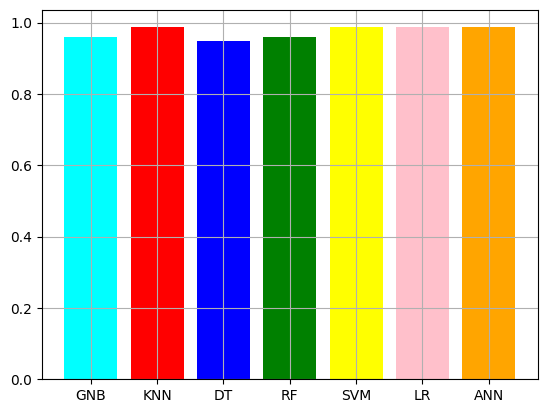

In [370]:
 r_test = [r_gnb, r_knn, r_dt, r_rf , r_svm , r_lr , r_ann]
 title = ['GNB' , 'KNN' , 'DT' , 'RF' , 'SVM' , 'LR' , 'ANN']
 color = ['cyan' , 'red' , 'blue' , 'green' , 'yellow' , 'pink' , 'orange']


 plt.bar(title , r_test , color = color)
 plt.grid()
 plt.show()